## Inspección al terminal de OpenBB
En el presente documento se hará una revisión a la API de OpenBB, un prometedor proyecto que busca brindar datos financieros de manera gratuita y que se puede trabajar tanto desde el terminal como desde un código de Python.

El proceso de instalación es el siguiente:
1. Contar con Python, Anaconda y Visual Studio para C++ (Community 2022 version). Todos agregando al PATH.
2. En el CMD, se debe instalar Git mediante anaconda: `conda install -c anaconda git`.
3. Se debe clonar el repositorio del proyecto OpenBB: `git clone https://github.com/OpenBB-finance/OpenBBTerminal.git`.
4. Nos dirigimos a la carpeta del proyecto: `cd openbbterminal`.
5. Se debe construir el entorno más actual de OpenBB: `conda env create -n obb --file build/conda/conda-3-9-env-full.yaml`.
6. Activamos el entorno: `conda activate obb`.
7. Instalamos algunas dependiencias: `pip install -r requirements-full.txt`.
8. Instalamos los requerimientos: `poetry install`.

Finalmente, ya se puede usar OpenBB terminal dentro de Python. En Visual Studio Code se puede usar la librería `openbb_terminal` siempre y cuando se seleccione como kernel a `obb`.

Más documentación en: `https://openbb-finance.github.io/OpenBBTerminal/`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from openbb_terminal.api import openbb

WARNING! Breaking changes incoming! Especially avoid using kwargs, since some of them will change.
For more information see the official documentation at: https://openbb-finance.github.io/OpenBBTerminal/api/


En OpenBB hay diversas secciones como: `stocks`, `crypto`, `etf`, `economy`, `forex`, `funds`, `alternative`, `econometrics`, `forecast`, entre otros. Se explorará algunas de las más resaltantes

### Stocks

En la sección de stocks se puede hacer importación de datos, gráficos, análisis cuantitativo, entre otros. Probaré con la serie de Apple. El gráfico más sencillo que puede realizarse es uno de `candle`:

Loading Daily AAPL stock with starting period 2020-07-01 for analysis.

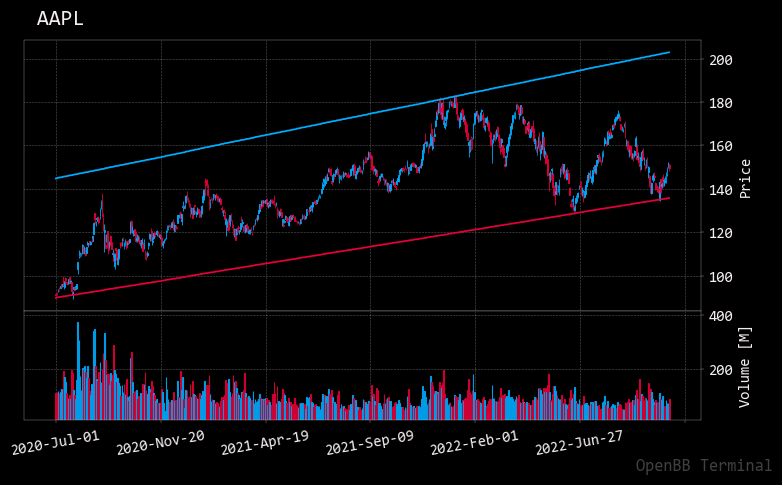

In [2]:
openbb.stocks.candle("AAPL", start_date=datetime(2020, 7, 1), add_trend=True)

Se puede pedir mayor información sobre la empresa, como por ejemplo:

In [3]:
dta = openbb.stocks.load("AAPL", start_date=datetime(2020, 1, 1))
dta.tail()

Loading Daily AAPL stock with starting period 2020-01-02 for analysis.

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2022-10-20,143.020004,145.889999,142.649994,143.389999,143.389999,64522000
2022-10-21,142.869995,147.850006,142.649994,147.270004,147.270004,86464700
2022-10-24,147.190002,150.229996,146.000000,149.449997,149.449997,75981900
2022-10-25,150.089996,152.490005,149.360001,152.339996,152.339996,74732300
2022-10-26,150.960007,151.990005,148.039993,149.350006,149.350006,88194300


### Forecast
Para el caso del forecasting, existen 11 algoritmos matemáticos/estadísticos de proyecciones de series de tiempo para la version 1.9.0. Entre ellas se encuentran las siguientes:

* expo -> Probabilistic Exponential Smoothing
* theta -> Theta Method
* linrerg -> Probabilistic Linear Regression (Logístico)
* regr -> Regression -> Resultado Determinístico
* rnn -> Probabilistic Recurrent Neural Network (RNN, LSTM, GRU)
* brnn -> Block Recurrent Neural Network (RNN, LSTM, GRU) (feat. Past covariates)
* nbeats -> Neural Bayesian Estimation (feat. Past covariates)
* tcn -> Temporal Convolutional Neural Network (feat. Past covariates)
* trans -> Transformer model (feat. Past covariates)
* tft -> Temporal Fusion Transformer (feat. Past covariates)
* nhits -> Neural Hierarchical Interpolation for Time Series Forecasting (feat. covariates)

Usando la serie ya importada de AAPL, se puede pedir la proyeccion de algunos de los algoritmos. He seleccionado 6: `expo`, `linregr`, `regr`, `rnn`, `rnn`, `nbeats`, `tcn`

In [4]:
dta_aapl = dta[["Close"]].reset_index()
dta_aapl.tail()

,date,Close
706,2022-10-20,143.389999
707,2022-10-21,147.270004
708,2022-10-24,149.449997
709,2022-10-25,152.339996
710,2022-10-26,149.350006


Primero comenzaré con una `rnn`, una Red Netural Recurrente

In [5]:
?openbb.forecast.rnn

Signature:
openbb.forecast.rnn(
    target_column: str = 'close',
    dataset_name: str = '',
    n_predict: int = 5,
    train_split: float = 0.85,
    forecast_horizon: int = 5,
    model_type: str = 'LSTM',
    hidden_dim: int = 20,
    dropout: float = 0.0,
    batch_size: int = 16,
    n_epochs: int = 100,
    learning_rate: float = 0.001,
    model_save_name: str = 'rnn_model',
    training_length: int = 20,
    input_chunk_size: int = 14,
    force_reset: bool = True,
    save_checkpoints: bool = True,
    export: str = '',
    residuals: bool = False,
    forecast_only: bool = False,
    start_date: Optional[datetime.datetime] = None,
    end_date: Optional[datetime.datetime] = None,
    naive: bool = False,
    external_axes: Optional[List[axes]] = None,
    chart: bool = False,
)
Docstring:
API function, use the chart kwarg for getting the view model and it's plot. See every parameter below:

    Parameters
    ----------
        data (Union[pd.Series, pd.DataFrame]):
       

In [7]:
rnn_f = openbb.forecast.rnn(
    data=dta_aapl,
    target_column="Close",
    n_predict=5
)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting RNN for 5 days


  0%|          | 0/108 [00:00<?, ?it/s]

RNN model obtains MAPE: 4.18%

In [8]:
rnn_f

(<TimeSeries (DataArray) (date: 735, component: 1, sample: 1)>
 array([[[ 75.0875  ]],
 
        [[ 74.3575  ]],
 
        [[ 74.95    ]],
 
        [[ 74.5975  ]],
 
        [[ 75.7975  ]],
 
        [[ 77.4075  ]],
 
        [[ 77.5825  ]],
 
        [[ 79.24    ]],
 
        [[ 78.17    ]],
 
        [[ 77.835   ]],
 
 ...
 
        [[142.99    ]],
 
        [[138.38    ]],
 
        [[142.41    ]],
 
        [[143.75    ]],
 
        [[143.86    ]],
 
        [[143.39    ]],
 
        [[147.27    ]],
 
        [[149.45    ]],
 
        [[152.34    ]],
 
        [[149.35    ]]], dtype=float32)
 Coordinates:
   * date       (date) datetime64[ns] 2020-01-02 2020-01-03 ... 2022-10-26
   * component  (component) object 'Close'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None,
 <TimeSeries (DataArray) (time: 108, component: 1, sample: 1)>
 array([[[132.69902]],
 
        [[140.839  ]],
 
        [[140.59503]],
 
        [[14

El resultado es una tupla de valores, donde el item cero es la serie historica, el item uno es el set usado para la proyeccion, el item dos es la proyeccion y el item tres es MAPE (Error Porcentual Absoluto Medio). Me quedare con el item 2, el de la proyeccion

In [19]:
rnn_f = rnn_f[2]
rnn_f

<TimeSeries (DataArray) (date: 5, component: 1, sample: 500)>
array([[[150.3292 , 154.13115, 150.56653, ..., 150.4079 , 154.20052,
         153.76811]],

       [[152.04501, 150.8204 , 152.32773, ..., 153.34131, 154.61363,
         151.12872]],

       [[151.17114, 149.57153, 151.58008, ..., 155.36801, 156.75847,
         155.76366]],

       [[147.43999, 148.1892 , 152.33597, ..., 155.51686, 156.98445,
         155.86969]],

       [[151.78027, 154.39133, 146.2234 , ..., 158.15382, 159.33229,
         154.39201]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2022-10-27 2022-10-28 ... 2022-11-02
  * component  (component) object 'Close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

Es importante notar que los valores que terminan de la proyeccion son estocasticos. Existen 500 valores por cada dia de proyeccion con el que se puede obtener una banda de confianza y una mediana. Para extraer unicamente la mediana se usara la funcion `.quantify_df()`

In [20]:
rnn_f = rnn_f.quantile_df()
rnn_f

,Close_0.5
date,
2022-10-27,150.027054
2022-10-28,150.181366
2022-10-31,150.637619
2022-11-01,150.376389
2022-11-02,150.657166


Una vez entendida la dinamica, se podria realizar la misma logica para cada uno de los 6 algoritmos seleccionados. Algunos nos daran valor unico como `regr`, `nbeats` y `tcn`, y otros sera estocastico como `expo`, `linreg` y `rnn`

In [21]:
# Declaracion
ticker = "AAPL"
days_to_predict = 5
target = "Close"

# Importacion
serie = openbb.stocks.load(ticker).reset_index()

# Estimacion
expo_f = openbb.forecast.expo(data=serie, target_column=target, n_predict=days_to_predict)[2]
linregr_f = openbb.forecast.linregr(data=serie, target_column=target, n_predict=days_to_predict)[2]
regr_f = openbb.forecast.regr(data=serie, target_column=target, n_predict=days_to_predict)[2]
rnn_f = openbb.forecast.rnn(data=serie, target_column=target, n_predict=days_to_predict)[2]
nbeats_f = openbb.forecast.nbeats(data=serie, target_column=target, n_predict=days_to_predict)[2]
tcn_f = openbb.forecast.tcn(data=serie, target_column=target, n_predict=days_to_predict)[2]

# Conversion a Dataframes
expo_f = expo_f.quantile_df().reset_index().rename({f"{target}_0.5": "Expo"}, axis=1)
linregr_f = linregr_f.quantile_df().reset_index().rename({f"{target}_0.5": "Linregr"}, axis=1)
regr_f = regr_f.pd_dataframe().reset_index().rename({f"{target}": "Regr"}, axis=1)
rnn_f = rnn_f.quantile_df().reset_index().rename({f"{target}_0.5": "RNN"}, axis=1)
nbeats_f = nbeats_f.pd_dataframe().reset_index().rename({f"{target}": "Nbeats"}, axis=1)
tcn_f = tcn_f.pd_dataframe().reset_index().rename({f"{target}": "TCN"}, axis=1)

# Union: merge
dta = expo_f.copy()

dta = dta.merge(linregr_f, how="inner").merge(regr_f, how="inner").merge(rnn_f, how="inner")\
    .merge(nbeats_f, how="inner").merge(tcn_f, how="inner")

# Setting index
dta.set_index("date", inplace=True)

Loading Daily AAPL stock with starting period 2019-10-23 for analysis.

  0%|          | 0/115 [00:00<?, ?it/s]

Exponential smoothing obtains MAPE: 3.65%

Predicting Logistic Regression for 5 days


  0%|          | 0/115 [00:00<?, ?it/s]

Logistic Regression model obtains MAPE: 3.59%

Predicting Regression for 5 days


  0%|          | 0/115 [00:00<?, ?it/s]

Regression model obtains MAPE: 2.85%

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting RNN for 5 days


  0%|          | 0/115 [00:00<?, ?it/s]

RNN model obtains MAPE: 3.97%

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting NBEATS for 5 days


  0%|          | 0/115 [00:00<?, ?it/s]

NBEATS model obtains MAPE: 4.86%

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting TCN for 5 days


  0%|          | 0/115 [00:00<?, ?it/s]

TCN model obtains MAPE: 7.69%

### Economy

### Alternative